# **CRISP DM IV & V - Modelling & Evaluation**

## Objectives

* Fulfil business requirement 2: The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.
* Select, build and assess ML model.
* Evaluate results, summarise findings and determine next steps.

## Inputs

* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings

## Outputs

* Train, validation, and test set image distribution plots
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model (create, train and save)
* Model performance learning curve plot
* Model evaluation pickle file
* Random image file prediction

## Additional Comments

* No comments


---

## Import regular packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Set Working Directory

In [3]:
cwd= os.getcwd()

In [4]:
os.chdir('/workspaces/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspaces/mildew-detection-in-cherry-leaves'

## Set input directories

In [6]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [8]:
labels = os.listdir(train_path)

print(
    f"Label: {labels}"
    )

Label: ['healthy', 'powdery_mildew']


## Set image shape

In [9]:
## Import saved image shape embedding pickle file
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Confirm image distribution between train, test and validation sets

Loop over folders (sets), determine image frequency and plot results on bar graph

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




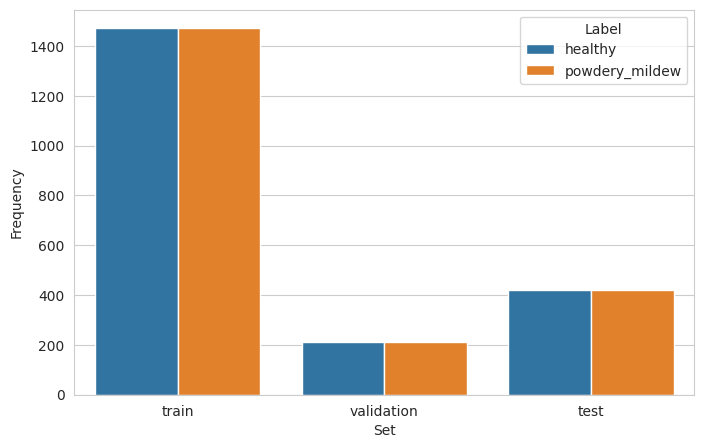

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
    
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

## Image data augmentation

We increase the training dataset's size by generating modified versions of the existing images. 
By introducing variations to the images, data augmentation helps models generalize more effectively and improve their ability to recognize and interpret new images.

### Import  and initialise ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Each set is then augmented and the target classes confirmed:

### Train set augmentation

In [13]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Validation set augmentation

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Test set augmentation

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Then each augmented set can be visualised in image plots:

### Augmented train image plot

(20, 256, 256, 3)


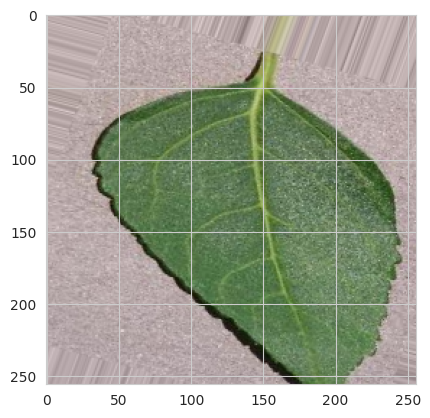

(20, 256, 256, 3)


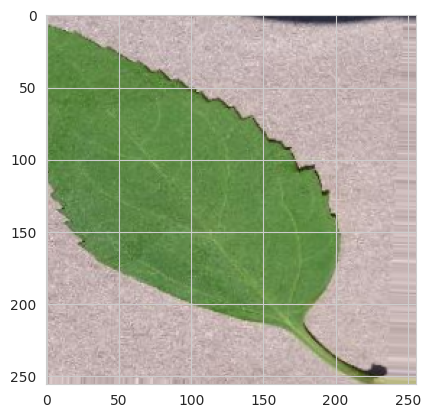

(20, 256, 256, 3)


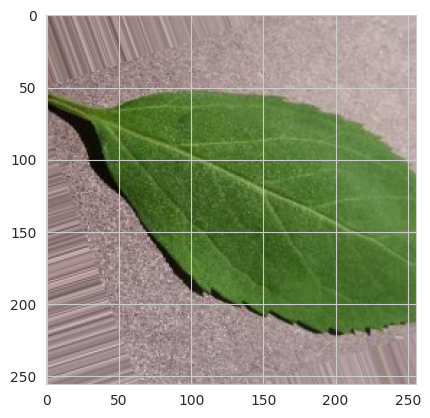

In [23]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

### Augmented validation image plot

(20, 256, 256, 3)


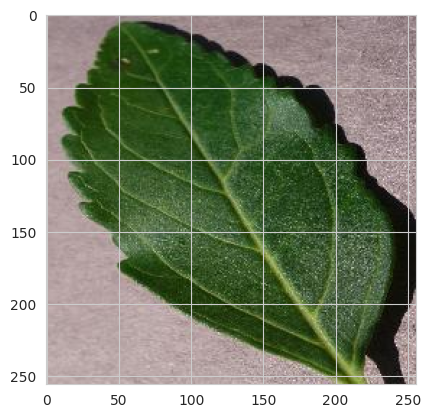

(20, 256, 256, 3)


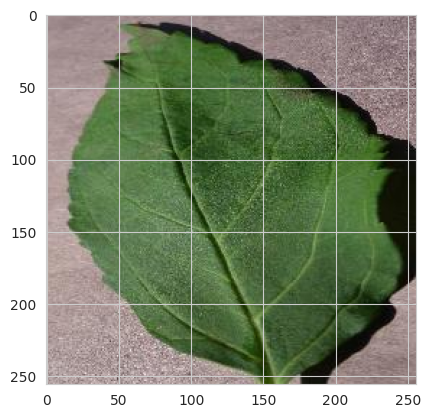

(20, 256, 256, 3)


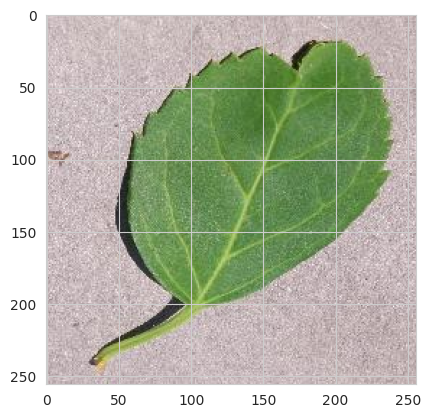

In [24]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

### Augmented test image plot

(20, 256, 256, 3)


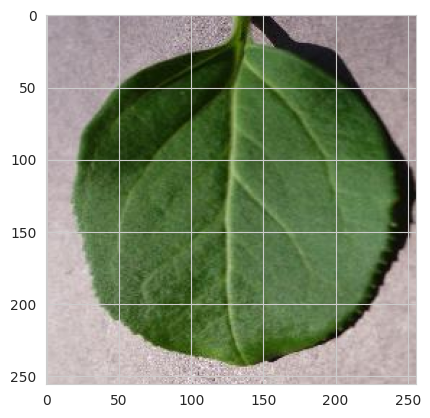

(20, 256, 256, 3)


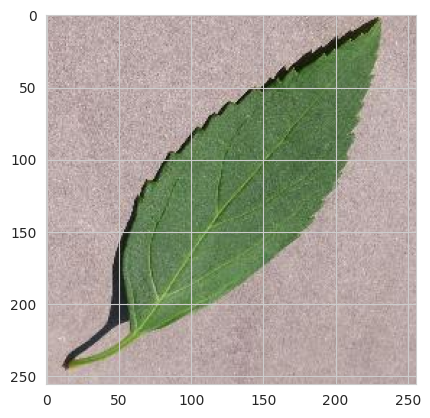

(20, 256, 256, 3)


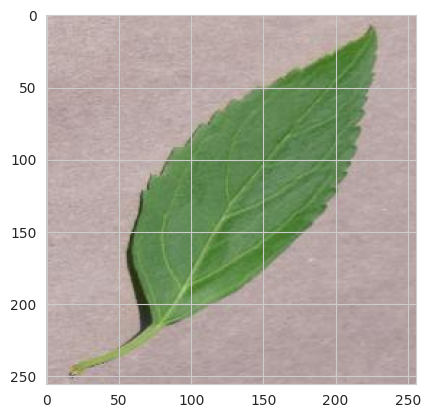

In [25]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class indices to pickle file

In [27]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Machine learning (ML) model

---

## Create Model

### Import packages

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Choosing an Activation Function for Binary Classification

* According to [Wikipedia](https://en.wikipedia.org/wiki/Computer_vision#Recognition), "Currently, the best algorithms for such tasks are based on convolutional neural networks.
* **add some more information here**

### Create Model

In [17]:
def create_model():
    model = Sequential()
    
    # We’ll intially add a convolutional 2D layer with 16 filters, 
    # a kernel size of 3x3, the input size set to our image_shape diemsniosn, 
    # 256x256 and 3 bytes of colour, and the activation as ReLU
    model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The convolution layers are flattened and fed into a dense, fully-connected layer
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    
    # A single output neuron contiaing a value from 0-1 where 0 = 'healthy' and 1 = 'powdery_mildew' 
    # Sigmoid is chosen as the activation function for Binary Classification
    model.add(Dropout(0.25))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Model summary

In [18]:
create_model().summary()

2023-07-10 08:18:22.454448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

## Model Training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss',patience=3)

In [20]:
model = create_model()

In [21]:
model.fit(
        train_set, # pass in the training set
        steps_per_epoch=len(train_set.classes)//batch_size,
        epochs=20,
        validation_data=validation_set, # pass in the validation set
        callbacks=[callback],
        verbose=1
        )

2023-07-10 08:18:46.331826: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
147/147 [==============================] - 185s 1s/step - loss: 0.3943 - accuracy: 0.8191 - val_loss: 0.2617 - val_accuracy: 0.9024
Epoch 2/20
147/147 [==============================] - 180s 1s/step - loss: 0.0995 - accuracy: 0.9641 - val_loss: 0.0643 - val_accuracy: 0.9833
Epoch 3/20
147/147 [==============================] - 177s 1s/step - loss: 0.0373 - accuracy: 0.9897 - val_loss: 0.0166 - val_accuracy: 0.9929
Epoch 4/20
147/147 [==============================] - 190s 1s/step - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 5/20
147/147 [==============================] - 189s 1s/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0254 - val_accuracy: 0.9929
Epoch 6/20
147/147 [==============================] - 185s 1s/step - loss: 0.0159 - accuracy: 0.9962 - val_loss: 0.0249 - val_accuracy: 0.9929


In [22]:
model.save('outputs/v1/mildew_detector_model.h5')

---

# Model Performance

---

### Model Learning Curve

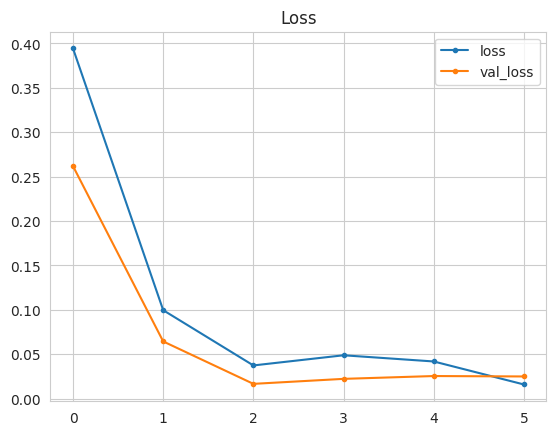

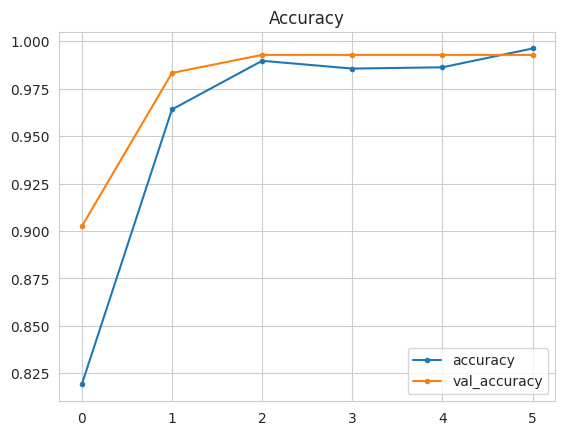

In [23]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

Load the saved model

In [24]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

Evaluate model on test set

In [25]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 14s 309ms/step - loss: 0.0424 - accuracy: 0.9941


Save evaluation as pickle file

In [26]:
joblib.dump(value=evaluation,
           filename=f'outputs/v1/evaluation.pkl')

['outputs/v1/evaluation.pkl']

## Test Prediction Using New Data

Load a healthy image as pil

Image shape: (256, 256), Image mode: RGB


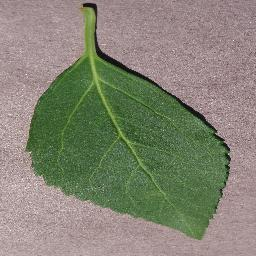

In [27]:
from tensorflow.keras.preprocessing import image

pointer = 8 
label = labels[0] # select healthy or powdery_mildew

pil_image_healthy = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image_healthy.size}, Image mode: {pil_image_healthy.mode}')
pil_image_healthy

The image is converted to an array in preparation for prediction

In [28]:
my_image_healthy = image.img_to_array(pil_image_healthy)
my_image_healthy = np.expand_dims(my_image_healthy, axis=0)/255
print(my_image_healthy.shape)

(1, 256, 256, 3)


Predict class

In [29]:
pred_proba = model.predict(my_image_healthy)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.999999922193993
healthy


# Push files to Repo